In [105]:
import pandas as pd
import numpy as np

## Reading the input data csv files

In [106]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [107]:
df_train.head()

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6


In [108]:
df_test.head()

,Index,A,B,C,D,E,F,G,H
0,866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215


In [109]:
df_train.isnull().sum() 

### No null values in the given dataset

A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
Target    0
dtype: int64

In [110]:
df_train.duplicated().sum()
## No duplicates 

0

- **The dataset is clean**

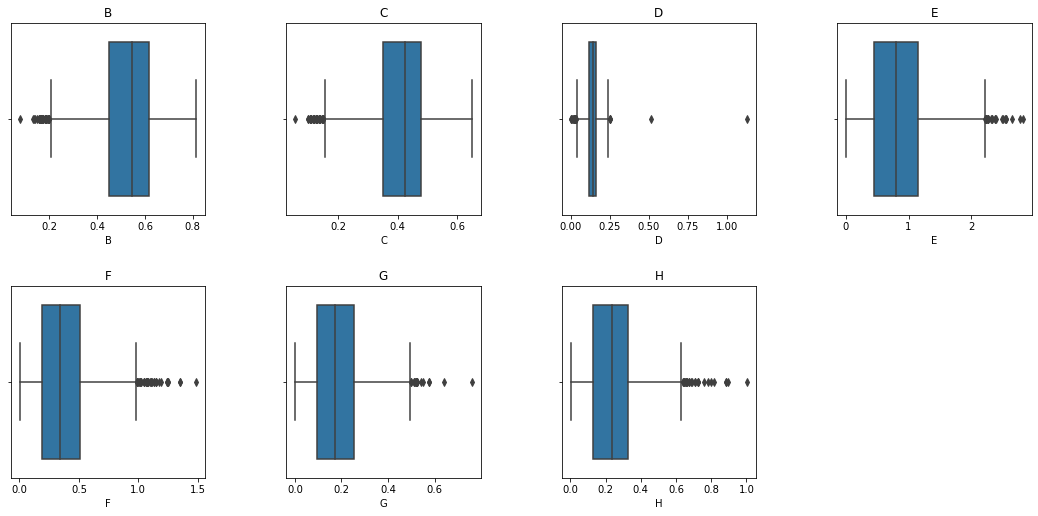

In [111]:
## checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt

def plot_outliers(dataframe):
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    fig.tight_layout(pad=5.0)
    axes = axes.flatten()

    for i, column in enumerate(dataframe.columns[:7]):  
        sns.boxplot(x=dataframe[column], ax=axes[i])
        axes[i].set_title(column)
    axes[-1].axis('off')
    plt.show()

df = df_train.drop(['A','Target'], axis = 1)
plot_outliers(df)


In [112]:
import pandas as pd

def remove_outliers(dataframe, columns):
    df = dataframe.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

df = remove_outliers(df_train, ['B','C','D','E','F','G','H'])

In [113]:
df

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6
...,...,...,...,...,...,...,...,...,...
3127,F,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9
3128,F,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12
3129,M,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11
3130,M,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9


### Column A has categorical values. since its a nominal data One-Hot Encoding is applied

In [114]:
df = pd.get_dummies(df, prefix='gender')
df

,B,C,D,E,F,G,H,Target,gender_F,gender_I,gender_M
0,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9,1,0,0
1,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12,1,0,0
2,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10,0,0,1
3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
4,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3127,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9,1,0,0
3128,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12,1,0,0
3129,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11,0,0,1
3130,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9,0,0,1


In [115]:
##  It's also applied to TEST  
df_test = pd.get_dummies(df_test, prefix='gender')
df_test.head()

,Index,B,C,D,E,F,G,H,gender_F,gender_I,gender_M
0,866,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325,0,0,1
1,1483,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245,0,0,1
2,599,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335,1,0,0
3,1702,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380,1,0,0
4,670,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215,0,0,1


## Splitting into validation and traning

In [116]:
from sklearn.model_selection import train_test_split
X = df.drop('Target',axis= 1)
Y =df['Target']
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=243)

In [117]:
## Scaling the features before splitting the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [118]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=243)

## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = LogisticRegression(max_iter=1000) 
logreg = LogisticRegression(solver='liblinear')


In [120]:
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [121]:
y_pred = logreg.predict(X_val)

In [122]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred,zero_division=1)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.22479338842975208
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00         6
           5       0.20      0.08      0.12        12
           6       0.30      0.36      0.33        39
           7       0.25      0.17      0.20        58
           8       0.26      0.39      0.31        87
           9       0.28      0.39      0.33       110
          10       0.16      0.31      0.22        80
          11       0.15      0.13      0.14        70
          12       0.00      0.00      0.00        36
          13       0.00      0.00      0.00        29
          14       1.00      0.00      0.00        19
          15       1.00      0.00      0.00        14
          16       1.00      0.00      0.00        11
          17       1.00      0.00      0.00        10
          18       1.00      0.00      0.00         5
          19       1.00     

In [123]:
### tuning the hyperparameters of logistic regression

from sklearn.model_selection import GridSearchCV

def tune_logistic_regression(X, y):
    # Define the hyperparameters to tune
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [100, 200, 500]
    }

    # Create the logistic regression model
    logreg = LogisticRegression()
    logreg = LogisticRegression(max_iter=1000)
    logreg = LogisticRegression(solver='liblinear')


    # Perform grid search with cross-validation
    grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)

    # Print the best hyperparameters and corresponding accuracy score
    print("Best Hyperparameters: ", grid_search.best_params_)
    print("Best Accuracy: ", grid_search.best_score_)


In [124]:
tune_logistic_regression(X_train, y_train)

c:\python38\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please 

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Best Hyperparameters:  {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy:  0.26179782009821534


In [125]:
## Best Hyperparameters:  {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
## Best Accuracy:  0.26179782009821534

In [126]:
logreg = LogisticRegression(C=1, max_iter=500, penalty = 'l2', solver='lbfgs')
logreg = LogisticRegression(max_iter=1000) 
logreg = LogisticRegression(solver='liblinear')

In [127]:
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [128]:
y_pred = logreg.predict(X_val)

In [129]:
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred,zero_division=1)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.22479338842975208
Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       1.00      0.00      0.00         6
           5       0.20      0.08      0.12        12
           6       0.30      0.36      0.33        39
           7       0.25      0.17      0.20        58
           8       0.26      0.39      0.31        87
           9       0.28      0.39      0.33       110
          10       0.16      0.31      0.22        80
          11       0.15      0.13      0.14        70
          12       0.00      0.00      0.00        36
          13       0.00      0.00      0.00        29
          14       1.00      0.00      0.00        19
          15       1.00      0.00      0.00        14
          16       1.00      0.00      0.00        11
          17       1.00      0.00      0.00        10
          18       1.00      0.00      0.00         5
          19       1.00     

## Making predictions on test data 

In [130]:
X_test = df_test.drop('Index', axis=1)  
X_test_scaled = scaler.transform(X_test)

In [131]:
# X_test_scaled

In [132]:
predictions = logreg.predict(X_test_scaled)
predictions

array([10,  9, 13, ..., 10, 10,  9], dtype=int64)

In [133]:
## converting array into dataframe
target = pd.DataFrame(predictions, columns=['Target'])

In [134]:
submission =  pd.concat([df_test['Index'],target],axis = 1)

In [135]:
submission.to_csv('submission.csv', index=False) 